In [1]:
import os
os.chdir("C:\\Users\\cason\\repos\\presidential-addresses\\presidential_addresses")

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer
from data.speeches import Speeches
from tqdm.notebook import tqdm, trange
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import imageio.v2 as imageio

In [3]:
speeches = Speeches().speeches_long

In [4]:
# Get 1000 most common words/phrases using tfidf
tfidf = TfidfVectorizer(
    max_features=1000, 
    stop_words='english', 
    ngram_range=(1, 4),
)
tfidf.fit(speeches['text'])
tfidf_features = tfidf.transform(speeches['text'])

In [5]:
# Linear discriminant analysis to get a sense of how well the speeches can be separated by president
lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(tfidf_features.toarray(), speeches['president'])
lda_features = lda.transform(tfidf_features.toarray())

In [6]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358


C:\Users\cason\AppData\Local\Temp\ipykernel_7576\3666216305.py:66: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"eda/lda-cloud-{frame:03d}.png"))


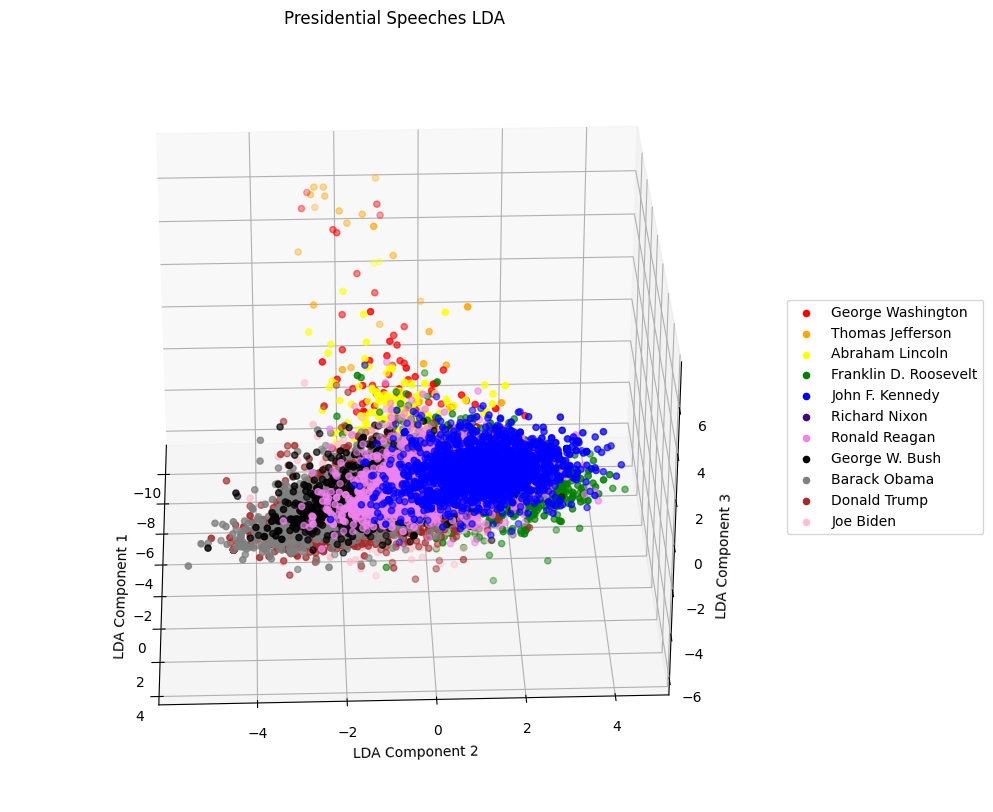

In [9]:
# Plot the results
interesting_presidents = [
    'George Washington',
    'Thomas Jefferson',
    'Abraham Lincoln',
    'Franklin D. Roosevelt',
    'John F. Kennedy',
    'Richard Nixon',
    'Ronald Reagan',
    'George W. Bush',
    'Barack Obama',
    'Donald Trump',
    'Joe Biden'
]

# Get color map using mpls color map
color_map = {}
for i, president in enumerate(interesting_presidents):
    color_map[president] = plt.cm.tab10(i)


# We want a 3-dimensional plot, rotating a little bit in each frame, 
# Then we will save each frame as a png and stitch them together into a gif
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

frame_nums = range(0, 360, 2)
images = []

for frame in frame_nums:
    print(frame)
    ax.clear()
    ax.view_init(elev=30., azim=frame)
    ax.set_title("Presidential Speeches LDA")
    ax.set_xlabel("LDA Component 1")
    ax.set_ylabel("LDA Component 2")
    ax.set_zlabel("LDA Component 3")
    # ax.set_xlim(-0.2, 0.2)
    # ax.set_ylim(-0.2, 0.2)
    # ax.set_zlim(-0.2, 0.2)

    
    for president in interesting_presidents:
        ax.scatter(
            lda_features[speeches['president'] == president, 0],
            lda_features[speeches['president'] == president, 1],
            lda_features[speeches['president'] == president, 2],
            label=president,
            color=color_map[president]
        )
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # extend frame edges to fit legend
    plt.tight_layout()
    plt.savefig(f"eda/lda-cloud-{frame:03d}.png")

    images.append(imageio.imread(f"eda/lda-cloud-{frame:03d}.png"))
    os.remove(f"eda/lda-cloud-{frame:03d}.png")

imageio.mimsave('eda/lda-cloud.gif', images)